## Business Case: Predicting the price range of the Flight Fare considering the different features given in the data

## Tasks

### Task 1:-Prepare a complete data analysis report on the given data.

### Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.


### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### READ DATA

In [2]:
data=pd.read_excel('Flight_Fare.xlsx')

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Domain Analysis

### In this flight fare data set we have 11 columns and 10683 rows. it shows the different  airline and the price of the ticket for each airline

   **Airline:**
            
      In airline column shows the different airline like IndiGo,Jet Airways,Vistara etc.. this column indicates that which airline is choosen by the passenger.
      
   **Date_of_journey:**
     
      In this date of journey column shows that at which date the passenger has travelled and which airline they have travelled.
      
   **Source:**
      
      Source column shows that at which place the passenger has started their journey. it is the main feature it has the most information because it is where journey has started. it has different places like bangalore,delhi,kolkata.
      
   **Destination:**
   
      In this column at which destination the passenger has reached from the boarding point. it is also a main feature because it has the more information about the destination point.
      
   **Route:**
   
      The "Route" column indicates that different airlines follow distinct routes to reach the same destination. For instance, Jet Airways travels from Delhi to Cochin via the route of Delhi to Lucknow and then from Bombay to Cochin.
      
   **Dep_Time:**
   
      Dep_time shows the at which time the flight has take off. the departure time is importent for passenger to reach the airport before the flight departure. it has the 24hr time format like '22.20','16.20' etc..
      
   **Arrival_Time:**
    
      This feature shows that at which time the specific airline reches the destination. it given in time and month format like 
      
   
   **Duration**:
    
      The "Duration" column represents the total time it takes for a flight to complete its journey from the
      source to the destination. This duration typically includes both the flying time and 
      any layovers or stopovers if applicable.

   **Total_Stops**: 
    
      The "Total_Stops" column provides information about the number of stops or layovers that a flight 
      will make during its entire journey from the source to the destination. It indicates how many 
      times the flight will land at intermediate airports or cities before reaching the final destination.

   **Additional_Info**: 
    
      The "Additional_Info" column contains supplementary information about the flight. This information may
      include details about the type of food service offered on the flight (e.g., "meal included" or "no meal"), 
      special amenities, or any additional information that may be relevant to passengers.

   **Price**: 
    
     The "Price" column represents the cost of the flight ticket for the entire journey. This includes all 
     expenses associated   with the flight before boarding, such as the base fare, taxes, fees, and any 
     additional charges. It is the total amount that a passenger would need to pay for the flight. 
     This column is crucial for pricing analysis and comparison when booking flights.

### BASIC CHECKS

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.value_counts().sum()

10682

In [10]:
data.shape

(10683, 11)

In [11]:
data.duplicated().sum()

220

In [12]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


* The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.So,firstly we convert it into date and time for proper predicion.

In [13]:
date_col=['Date_of_Journey','Arrival_Time','Dep_Time']

In [14]:
for column in date_col:
    data[column]=pd.to_datetime(data[column])

In [15]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### EXPLORATORY DATA ANALYSIS

#### UNIVARIATE

In [16]:
# Categorical Data
cat_col=data[['Airline','Source','Destination','Total_Stops','Additional_Info']]

In [17]:
#Numerical Data
num_col=data[['Date_of_Journey','Dep_Time','Arrival_Time','Duration']]

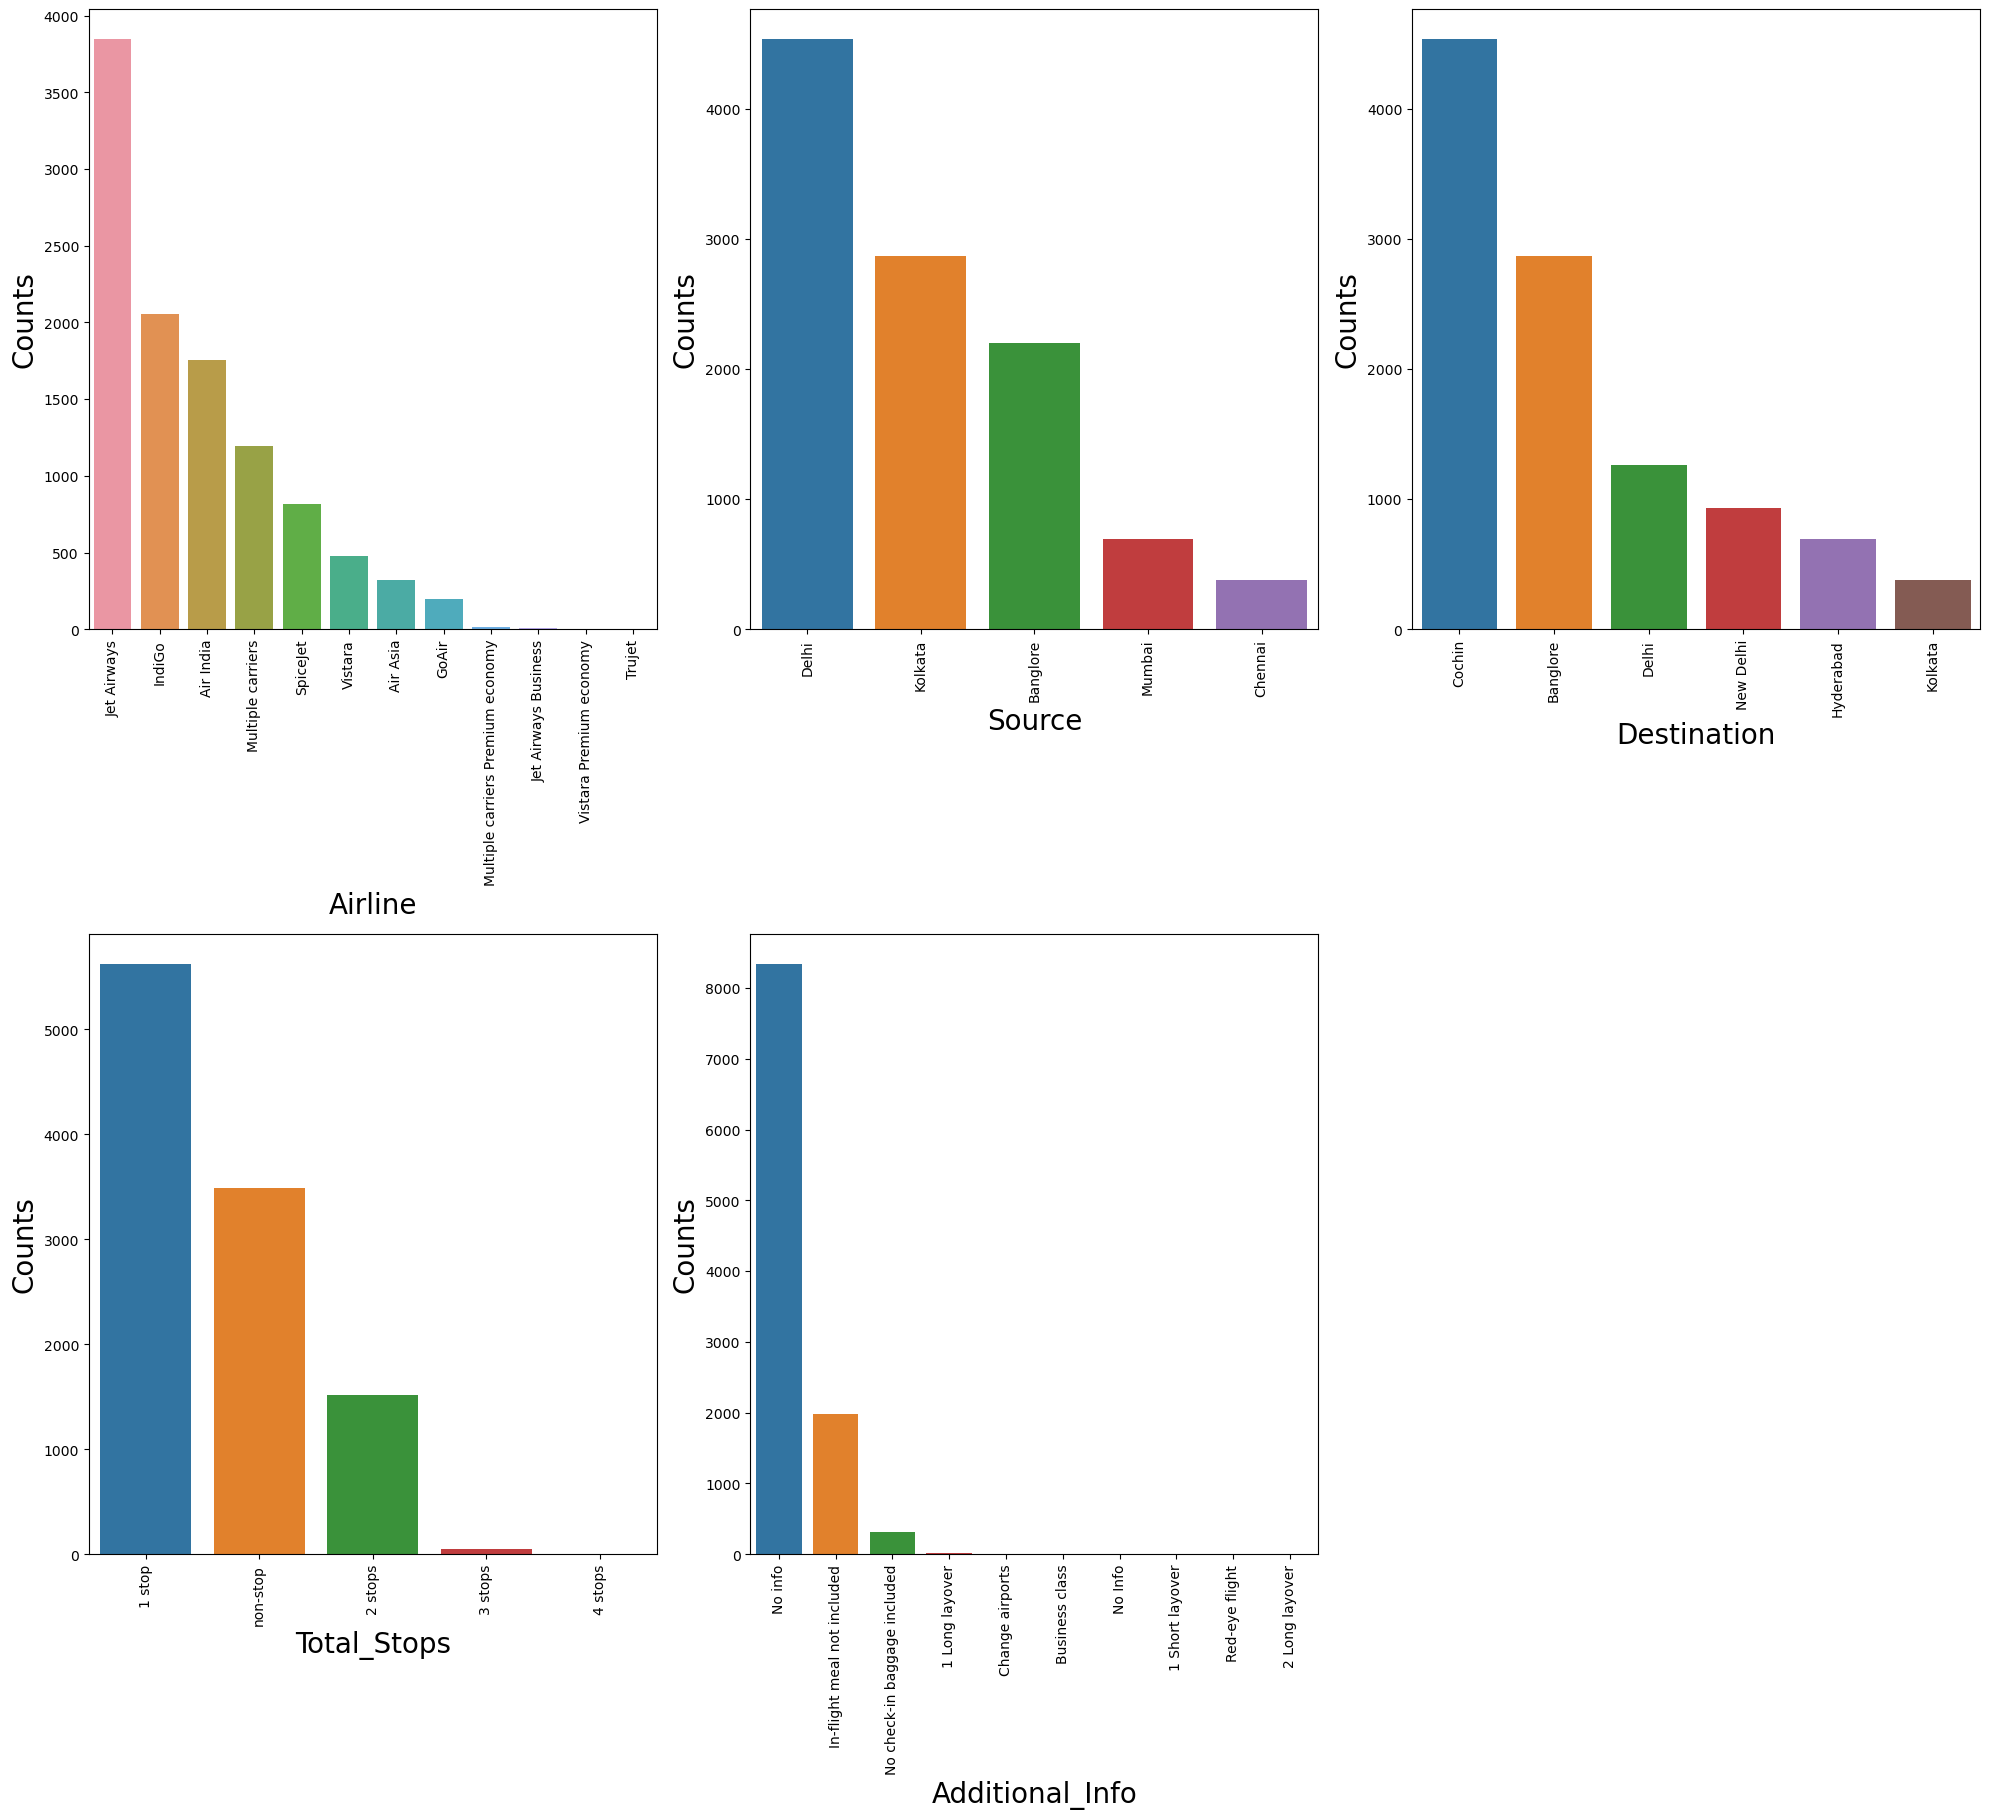

In [18]:
#count plot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for i in cat_col:
    if plotnumber<=6:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=i, data=cat_col, order=cat_col[i].value_counts().index)
        plt.xlabel(i, fontsize=20)
        plt.ylabel('Counts', fontsize=20)
        plt.xticks(rotation=90)
    plotnumber += 1
plt.tight_layout()


### Insights

### Insights for Airline

    * Jet Airways is the most frequently occurring airline with 3,849 instances, followed by IndiGo with 2,053 instances, indicating their prevalence.
    * Airlines like Jet Airways Business and Vistara Premium Economy are relatively rare, each appearing only a few times.
    
### Insights for Source

    * Delhi is the most frequently chosen departure city in the flight prediction dataset, with 4,537 occurrences.
    * Kolkata follows as the second most common departure city, appearing 2,871 times.
    * Bangalore is also a popular starting point for flights, with 2,197 instances.
    * Mumbai's occurrence as a departure city is comparatively lower, with 697 instances.
    * Chennai is the least frequent departure city, with only 381 occurrences.
    
### Insights for Destination

    * Cochin is the most frequently selected destination in the dataset, with 4,537 occurrences.
    * Banglore is the second most common destination, appearing 2,871 times.
    * Delhi and New Delhi together account for 2,197 instances as destinations.
    * Hyderabad is a less frequent choice, with 697 occurrences.
    * Kolkata is the least common destination among the options, with 381 instances.
    
### Insights for Total_Stops

    * "1 stop" flights are the most prevalent in the dataset, with 5,625 occurrences.
    * "Non-stop" flights are the second most common, appearing 3,491 times.
    * "2 stops" flights are the next in frequency, with 1,520 instances.
    * "3 stops" flights are relatively rare, with only 45 occurrences.
    * There is only one instance of a "4 stops" flight in the dataset.
    
### Insights for Additional_Info

    * "No info" is the most common additional information in the dataset, with 8,345 occurrences.
    * "In-flight meal not included" is the second most frequent, appearing 1,982 times.
    * "No check-in baggage included" is relatively less common, with 320 instances.
    * Other additional information categories, such as "1 Long layover," "Change airports," "Business class," "No Info," "1 Short layover," "Red-eye flight," and "2 Long layover," are rare, with very few occurrences.


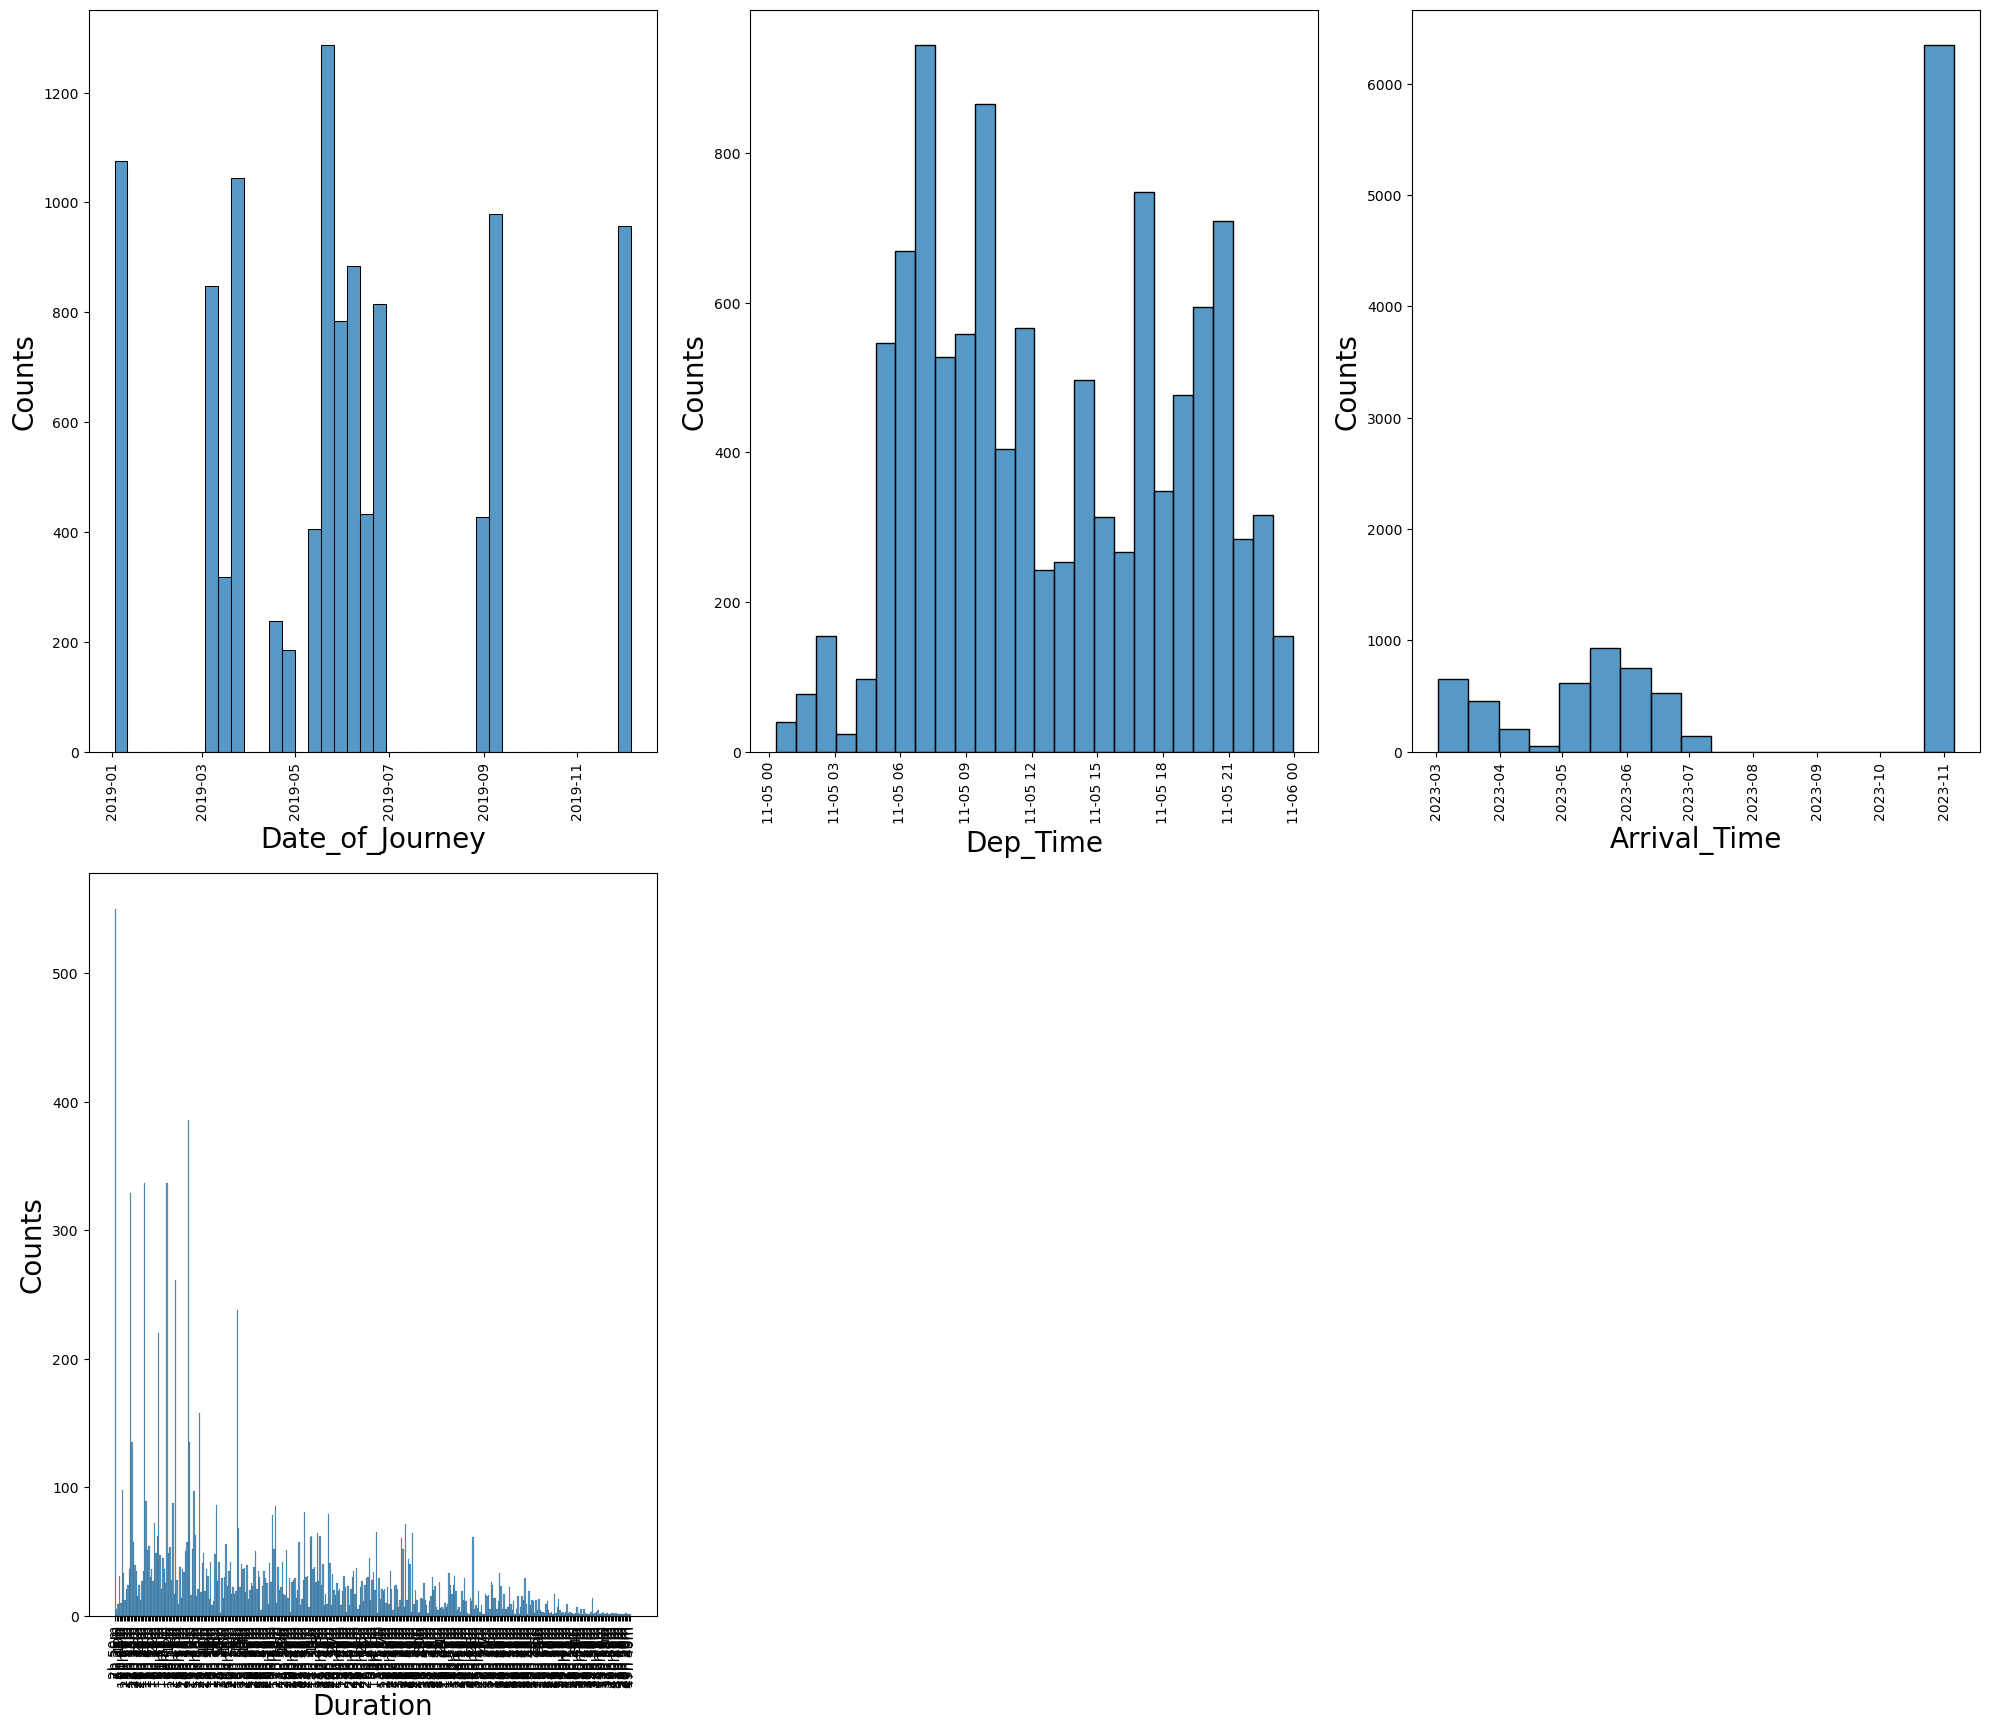

In [19]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=6:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Counts', fontsize=20)
        plt.xticks(rotation=90)
    plotnumber += 1
plt.tight_layout()
plt.show()

### Insights

    * When visualizing 'Date_of_Journey,' 'Dep_Time,' 'Arrival_Time,' and 'Duration,' it's evident that they overlap significantly, making it challenging to discern clear distributions due to their time-related nature.# ## Insights

In [20]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### BIVARIATE ANALYSIS

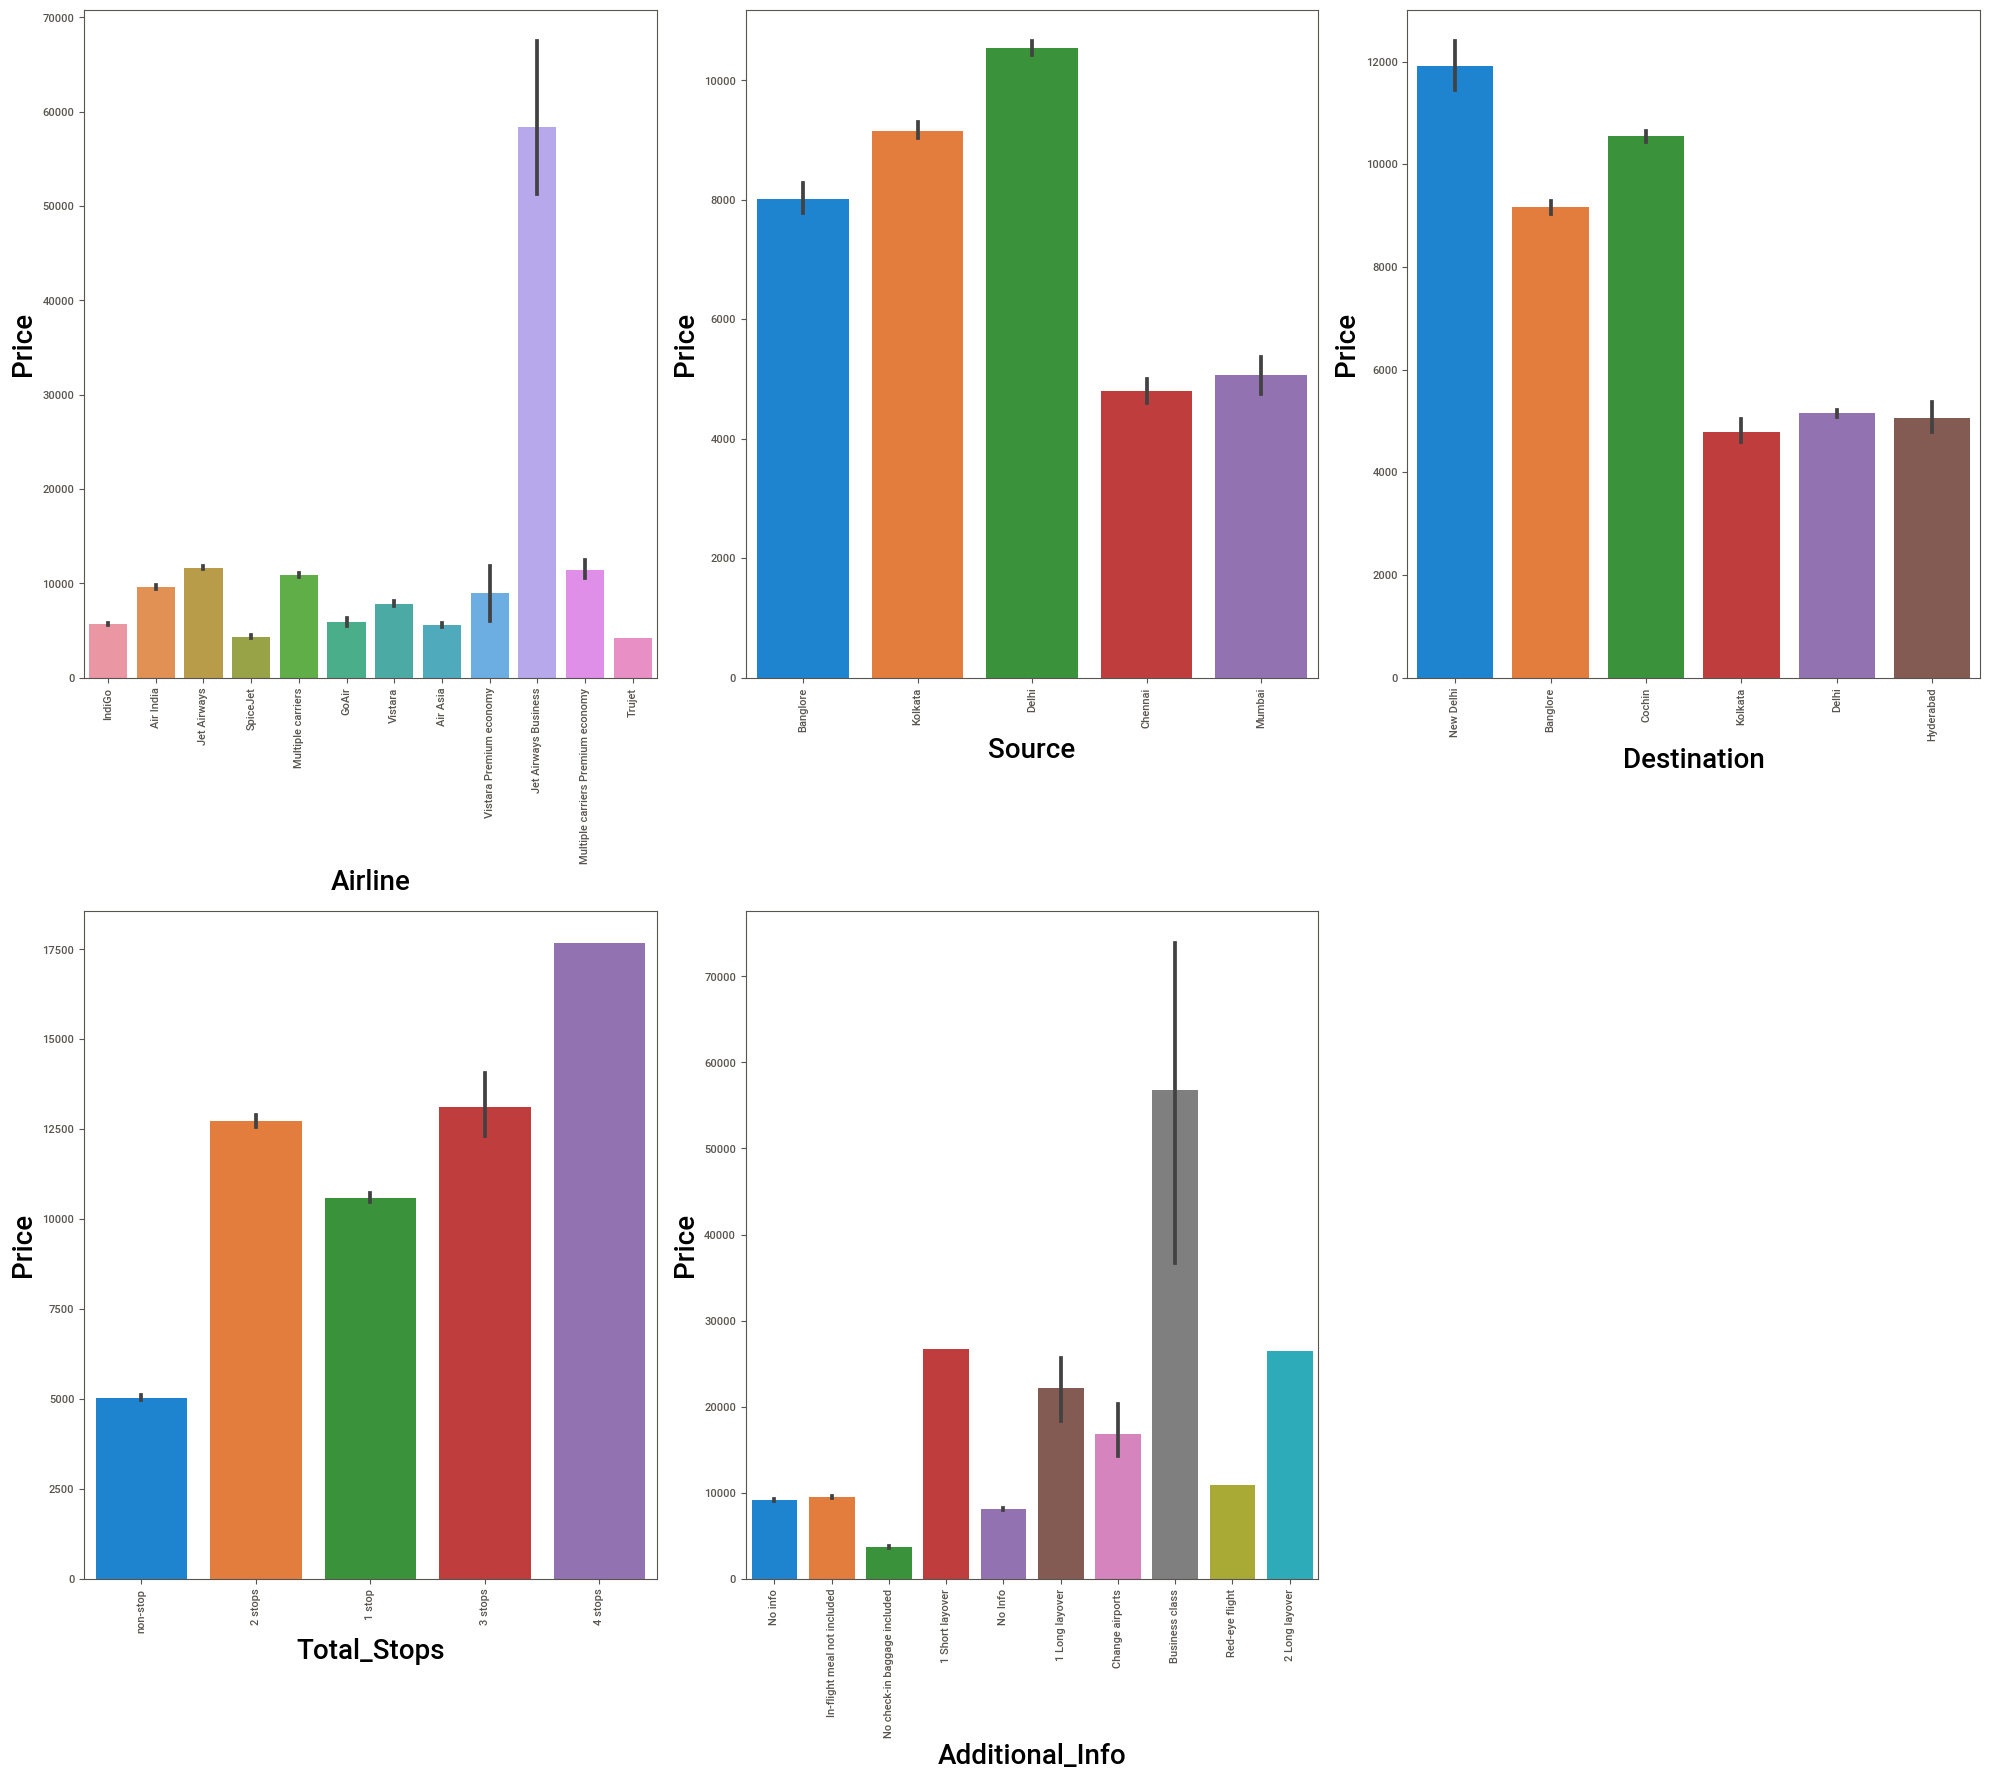

In [21]:
#Bar plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in cat_col:
    if plotnumber<=6:
        ax= plt.subplot(3,3,plotnumber)
        sns.barplot(x=data[column],y=data['Price'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

## Insights

### Insights based on Price
 #### Airline
    * The prices for Jet Airways Business appear significantly higher in comparison to other options.
    * Other airlines offer prices within a similar price range.
#### Source
    * Delhi appears to have a higher price range compared to other airports.
    * Kolkata and Bangalore are the second and third airports with prices in the range, respectively.
#### Destination
    * Delhi appears to have a higher price range compared to other airports.
    * Bangalore and Cochin are the second and third airports with prices in the range, respectively.
#### Total_Stops
    * Data for flights with 4 stops is limited, and it typically indicates long-distance journeys, which tend to be more costly.
    * Flights with 2 stops and 3 stops appear to have a similar price range.
#### Additional_Info
    * Business class tickets have a significantly higher price range compared to other fare classes.

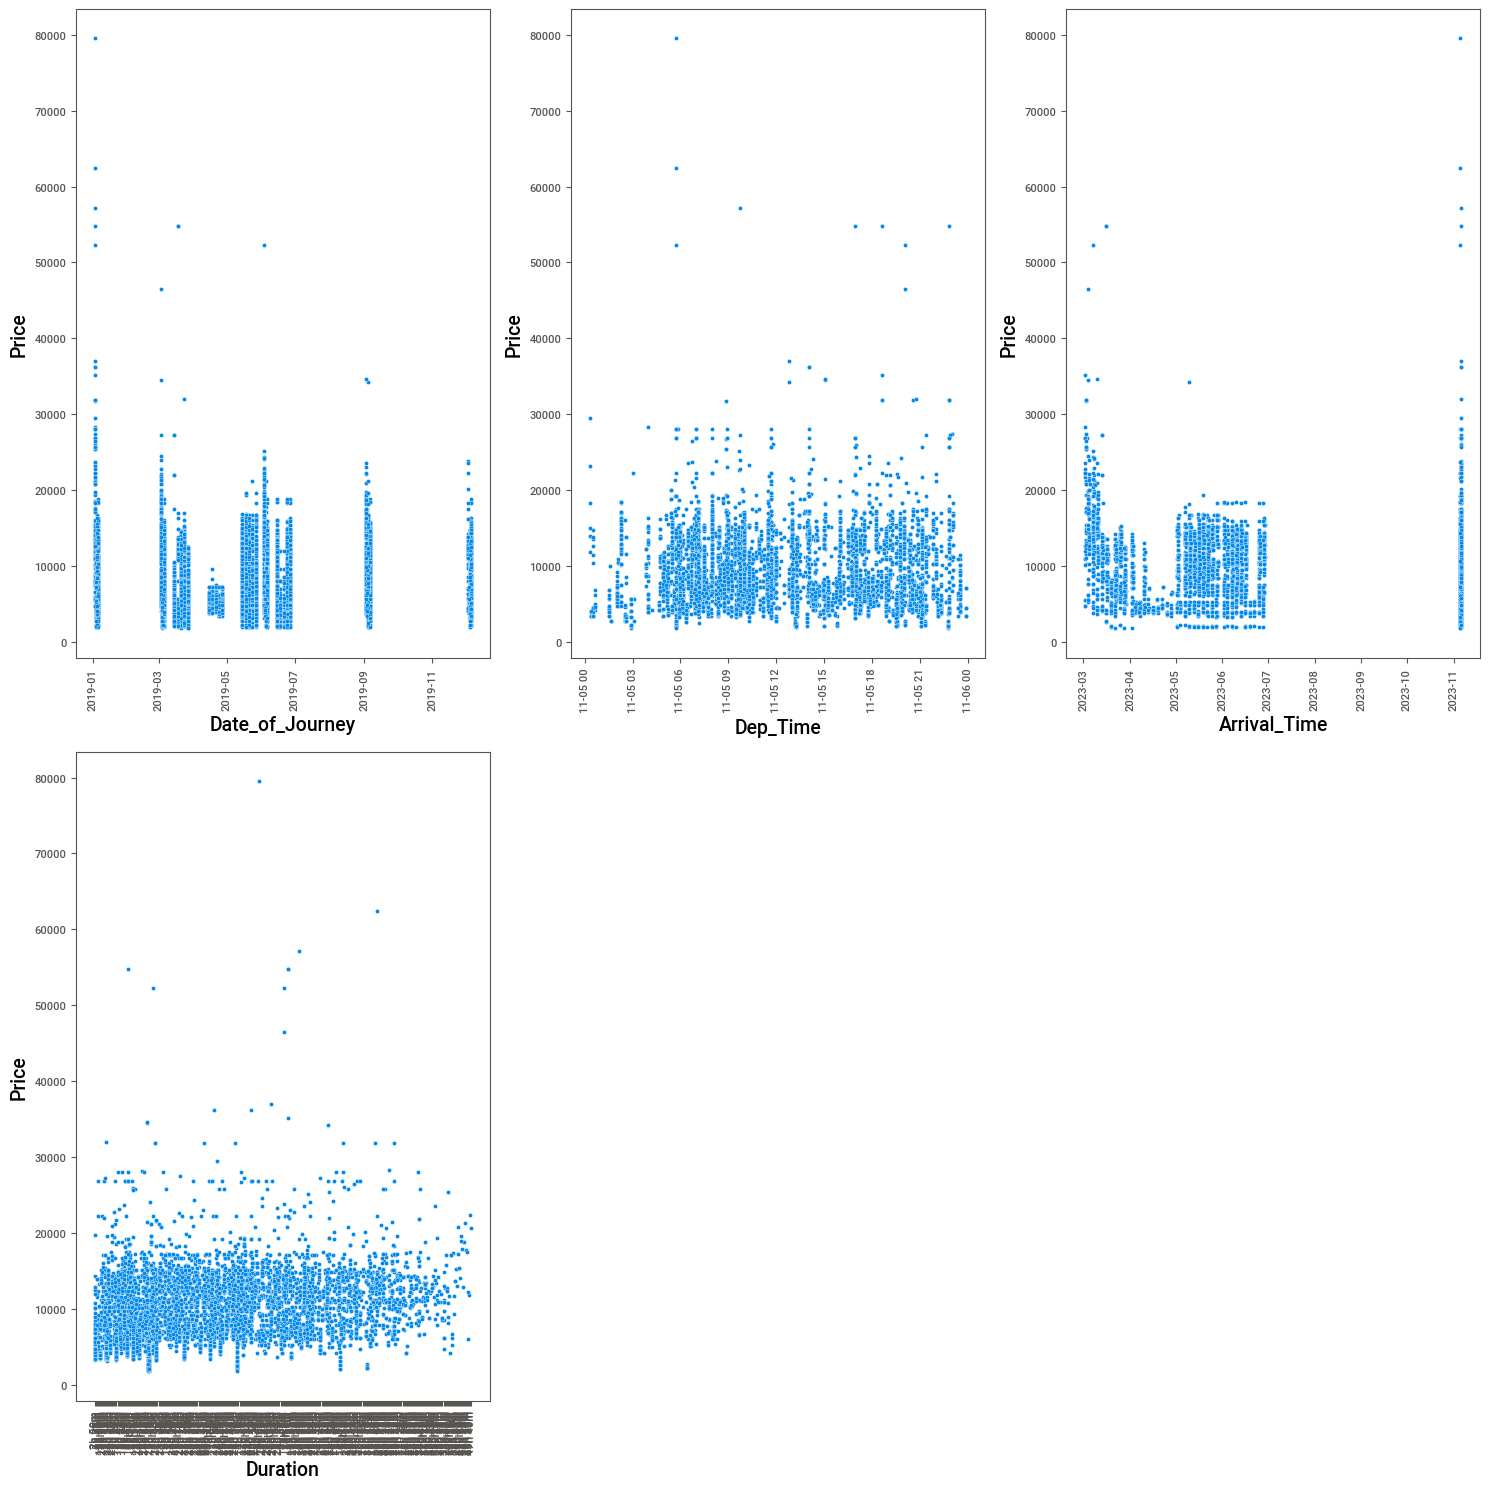

In [22]:
#ScatterPlot
plt.figure(figsize = (15, 15))
plotnumber = 1

for i in num_col:
    plt.subplot(2, 3, plotnumber)
    sns.scatterplot(x = data[i], y = data.Price)
    plt.xlabel(i, fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    plotnumber = plotnumber + 1
    plt.xticks(rotation=90)
plt.tight_layout()

There is no link between any of the features

### DATA PREPROCESSING

In [23]:
# Check for Missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [24]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,2019-06-05,Delhi,Cochin,NaN,2023-11-05 09:45:00,2023-05-07 09:25:00,23h 40m,NaN,No info,7480


In [25]:
data.dropna(inplace=True)

In [26]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [27]:
#check for Duplicate value
data.duplicated().sum()

220

 In this specific scenario, involving flight fare prediction based on date, route, and the same location, it is advisable to skip the step of handling duplicate data.Retaining duplicates can enhance the accuracy and effectiveness of your flight fare prediction model.

So we skip the step of handle duplicate 

In [28]:
# To extract the 'Date_of_Journey' column into new columns 'Day' and 'Month' for prediction purposes

In [29]:
data['Day']=data.Date_of_Journey.dt.day

In [30]:
data['Month']=data['Date_of_Journey'].dt.month

In [31]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-05 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-05 05:50:00,2023-11-05 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-05 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9


In [32]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [33]:
#  To extract the 'Dep_time' column into new columns 'Dep_hour' and 'Dep_min for prediction purposes

In [34]:
data['Dep_hour']=data['Dep_Time'].dt.hour

In [35]:
data['Dep_min']=data['Dep_Time'].dt.minute

In [36]:
data.drop('Dep_Time',axis=1,inplace=True)

In [37]:
data.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-05 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25


In [38]:
data['Arrival_hour']=data['Arrival_Time'].dt.hour

In [39]:
data['Arrival_min']=data['Arrival_Time'].dt.minute

In [40]:
data.drop('Arrival_Time',axis=1,inplace=True)

In [41]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


In [42]:
# To extract the Duration Column into minute for prediction

In [43]:
data['Duration']=pd.to_timedelta(data['Duration']).dt.total_seconds()

In [44]:
data['Duration_min']=data['Duration']/60

In [45]:
data.drop('Duration',axis=1,inplace=True)

In [46]:
data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1140.0


In [47]:
# Extract Categorical data into Numerical Data

In [48]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [49]:
#onhot encoding
data2=data.copy()

In [50]:
df1=pd.get_dummies(data2['Airline'],prefix='Airline',drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop(['Airline'],axis=1)

In [51]:
data2.head(3)

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,...,0,0,1,0,0,0,0,0,0,0


In [52]:
data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [53]:
df2=pd.get_dummies(data2['Source'],prefix='Source',drop_first=True)
data2=pd.concat([data2,df2],axis=1).drop(['Source'],axis=1)

In [54]:
data2.head(3)

,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,...,0,0,0,0,0,0,0,1,0,0


In [55]:
data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [56]:
df3=pd.get_dummies(data2['Destination'],prefix='Destination',drop_first=True)
data2=pd.concat([data2,df3],axis=1).drop(['Destination'],axis=1)

In [57]:
data2.head(3)

,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0


<Axes: xlabel='Total_Stops', ylabel='count'>

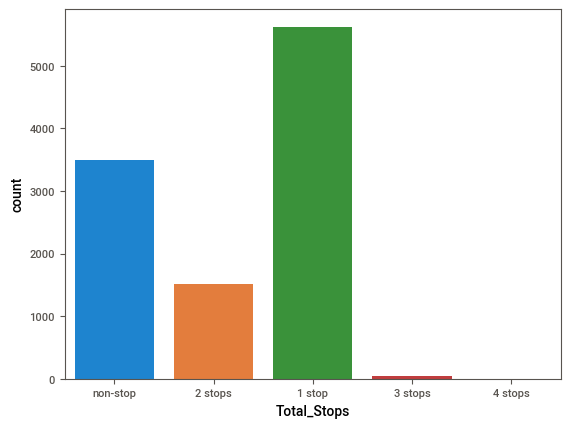

In [58]:
sns.countplot(x=data['Total_Stops'])

In [59]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [60]:
data2.Total_Stops=data2.Total_Stops.map({'1 stop':4,'non-stop':3,'2 stops':2,'3 stops':1,'4 stops':0})

In [61]:
data2.head(pd.set_option('display.max_columns',None))

,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,3,No info,3897,24,3,22,20,1,10,170.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,445.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,1140.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,4,No info,6218,5,12,18,5,23,30,325.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,4,No info,13302,3,1,16,50,21,35,285.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,3,No info,4107,4,9,19,55,22,25,150.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,CCU → BLR,3,No info,4145,27,4,20,45,23,20,155.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,BLR → DEL,3,No info,7229,27,4,8,20,11,20,180.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,3,No info,12648,3,1,11,30,14,10,160.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


### FEATURE ENGINEERING

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

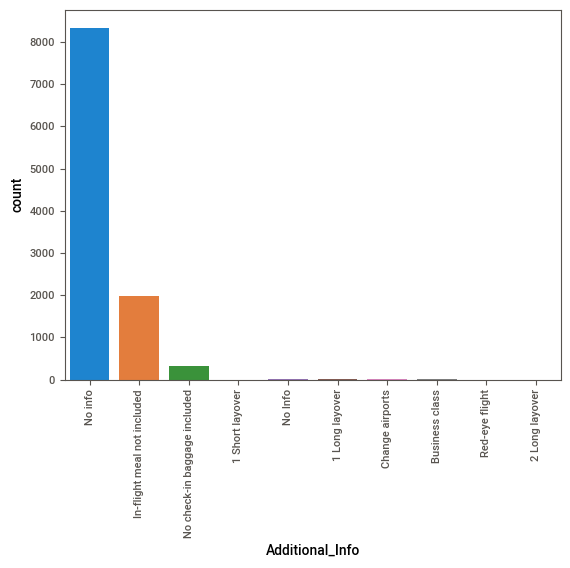

In [62]:
sns.countplot(x=data['Additional_Info'])
plt.xticks(rotation=90)

In [63]:
# drop the Additional info column because  no_info values most rows no use 
data2.drop('Additional_Info',axis=1,inplace=True)

In [64]:
# drop the Route because already cover all the data from other columns
data2.drop('Route',axis=1,inplace=True)

In [65]:
# checking correlation
# Correlation Only for Continous Data so We extract the continous data for correlation  and also drop the target
Corr_data=data2[['Day','Month','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Duration_min']]

In [66]:
Corr_data.corr()

,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_min
Day,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.038360
Month,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,0.055136
Dep_hour,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,0.002088
Dep_min,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.019099
Arrival_hour,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.051531
Arrival_min,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.069663
Duration_min,-0.038360,0.055136,0.002088,-0.019099,0.051531,-0.069663,1.000000


Text(0.5, 1.0, 'Correlation between the features')

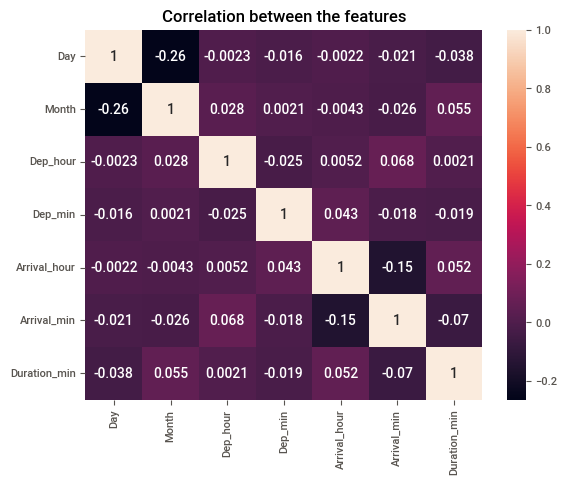

In [67]:
sns.heatmap(Corr_data.corr(),annot=True)
plt.title("Correlation between the features")

No highly correlated values in the features

### Data Analysis

### Summary

    * The dataset contains 10,683 records with features including Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, and Additional_Info, which provide information about travel journeys.
    
    * The dataset consists of Date_of_Journey with 12 unique dates, Source with 5unique sources, Destination with 5 unique destinations, Route with 6 unique routes, Dep_Time with 128 unique departure times, Arrival_Time with 222 unique arrival times, Duration with 1,343 unique durations, and Total_Stops with 5 unique values, along with Additional_Info containing 10 unique additional information categories.
    
    * Jet Airways is the most frequently occurring airline with 3,849 instances, followed by IndiGo with 2,053 instances, indicating their prevalence.
    
    * Airlines like Jet Airways Business and Vistara Premium Economy are relatively rare, each appearing only a few times.
    
    * Delhi is the most frequently chosen departure city in the flight prediction dataset, with 4,537 occurrences.
    
    * Kolkata follows as the second most common departure city, appearing 2,871 times.
    
    * Bangalore is also a popular starting point for flights, with 2,197 instances.
    
    * Cochin is the most frequently selected destination in the dataset, with 4,537 occurrences.
    
    * Banglore is the second most common destination, appearing 2,871 times.
    
    * Delhi and New Delhi together account for 2,197 instances as destinations.
    
    * "1 stop" flights are the most prevalent in the dataset, with 5,625 occurrences.
    
    * "Non-stop" flights are the second most common, appearing 3,491 times.
    
    * "No info" is the most common additional information in the dataset, with 8,345 occurrences.
    
    * "In-flight meal not included" is the second most frequent, appearing 1,982 times.
    
    * When visualizing 'Date_of_Journey,' 'Dep_Time,' 'Arrival_Time,' and 'Duration,' it's evident that they overlap significantly, making it challenging to discern clear distributions due to their time-related nature.
    
    * The prices for Jet Airways Business appear significantly higher in comparison to other options.
    
    * Delhi appears to have a higher price range compared to other airports.
    
    * Data for flights with 4 stops is limited, and it typically indicates long-distance journeys, which tend to be more costly.
    
    * Business class tickets have a significantly higher price range compared to other fare classes. 
    
    * There is no correaltion Between features.

### MODEL CREATION

In [68]:
# splitting X and y
X= data2.drop('Price',axis=1)
y=data2[['Price']]

In [69]:
# Extract Train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

### Linear Regression

In [70]:
#import Libraries
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [71]:
lr.fit(X_train,y_train)

LinearRegression()

In [72]:
y_pred=lr.predict(X_test)

### Model Evaluation

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [74]:
#R2_SCORE
r2=r2_score(y_test,y_pred)
r2

0.5794694217394092

In [75]:
#Adjust R2_score
adj_r2=1-(1-r2)*(3205-1)/(3205-28-1)
adj_r2

0.575761973316457

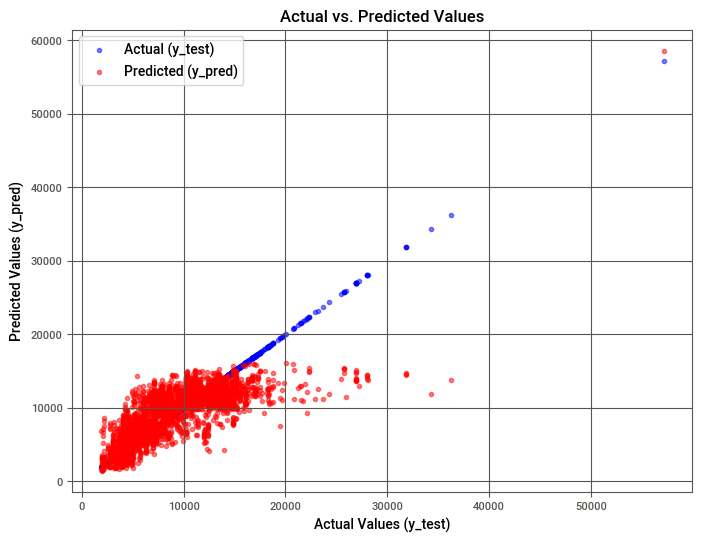

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


### Insights

     Our linear model's prediction R-squared (R2) score is 57%. so our linear regression model accounts for approximately
    57% of the variance in the flight fares.

### KNN Regressor

In [77]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)

In [78]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [79]:
y_pred=knn.predict(X_test)

### Model Evaluation

In [80]:
#R2_Sccore
knn_r2=r2_score(y_test,y_pred)
knn_r2

0.5528909899503456

In [81]:
# Adjust R2_score
adj_r2=1-(1-knn_r2)*(3205-1)/(3205-28-1)
adj_r2

0.5489492228592276

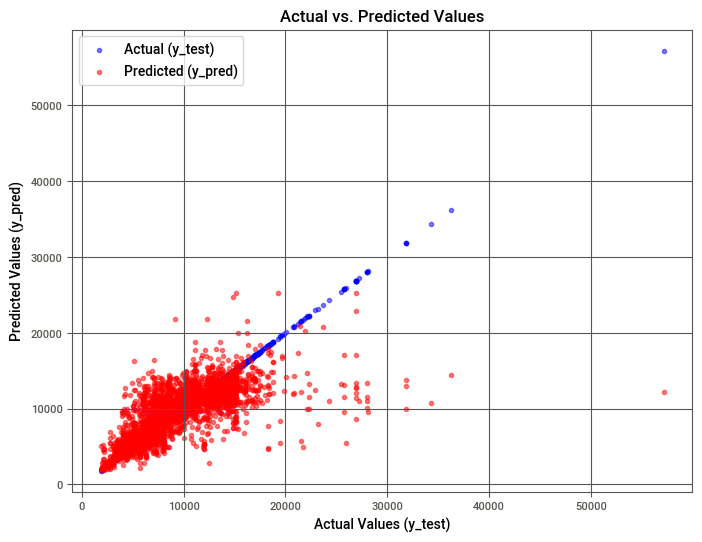

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


### Insights

       Our KNN Regressor  model's prediction R-squared (R2) score is 55%. so our  KNN Regressor model accounts 
    for approximately 55% of the variance in the flight fares. 

### Support Vector Regressor 

In [130]:
from sklearn.svm import SVR
svm=SVR()

In [84]:
svm.fit(X_train,y_train)

SVR()

In [85]:
y_pred=svm.predict(X_test)

### Model Evaluation

In [86]:
#R2_Score
svm_r2=r2_score(y_test,y_pred)
svm_r2

0.15569252879881346

In [87]:
# Adjust R2_score
adj_r2=1-(1-svm_r2)*(3205-1)/(3205-28-1)
adj_r2

0.14824901205018837

### Cross Validation 

In [88]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
scores = cross_val_score(svm, X, y, cv=5, scoring='r2')

print("Cross-validation R2 scores:", scores)
print("Mean R2 Score:", scores.mean())
print("Standard Deviation of R2 Score:", scores.std())


Cross-validation R2 scores: [0.1481488  0.14529044 0.164505   0.17083266 0.15646657]
Mean R2 Score: 0.15704869298676694
Standard Deviation of R2 Score: 0.009627023064763698


### HyperParameter Tuning for SVM

In [90]:
#We use GridSearch CV
from sklearn.model_selection import RandomizedSearchCV
#defining Hyperparameter 
param_grid={'C':[0.001,0.01,0.1,2,5,6,70,80],'kernel':['linear'],'epsilon': [0.01, 0.1, 0.2, 0.5, 1.0]}
model=SVR()
grid=RandomizedSearchCV(model,param_grid,verbose=2,scoring='r2',cv=5)
grid.fit(X,y)
print(grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................C=0.001, epsilon=0.2, kernel=linear; total time=   4.0s
[CV] END ................C=0.001, epsilon=0.2, kernel=linear; total time=   3.9s
[CV] END ................C=0.001, epsilon=0.2, kernel=linear; total time=   3.9s
[CV] END ................C=0.001, epsilon=0.2, kernel=linear; total time=   3.9s
[CV] END ................C=0.001, epsilon=0.2, kernel=linear; total time=   3.7s
[CV] END ...................C=70, epsilon=0.1, kernel=linear; total time=11.2min
[CV] END ...................C=70, epsilon=0.1, kernel=linear; total time=15.8min
[CV] END ...................C=70, epsilon=0.1, kernel=linear; total time= 9.8min
[CV] END ...................C=70, epsilon=0.1, kernel=linear; total time= 9.6min
[CV] END ...................C=70, epsilon=0.1, kernel=linear; total time=11.6min
[CV] END ..................C=70, epsilon=0.01, kernel=linear; total time=14.2min
[CV] END ..................C=70, epsilon=0.01, k

In [131]:
svm=SVR(kernel='linear',epsilon=0.01,C=70)

In [132]:
svm.fit(X_train,y_train)

SVR(C=70, epsilon=0.01, kernel='linear')

In [133]:
y_pred=svm.predict(X_test)

### Model Evaluation

In [134]:
#R2_Score
svm_r2=r2_score(y_test,y_pred)
svm_r2

0.5071936473188907

In [135]:
# Adjust R2_score
adj_r2=1-(1-svm_r2)*(3205-1)/(3205-28-1)
adj_r2

0.5028490069300144

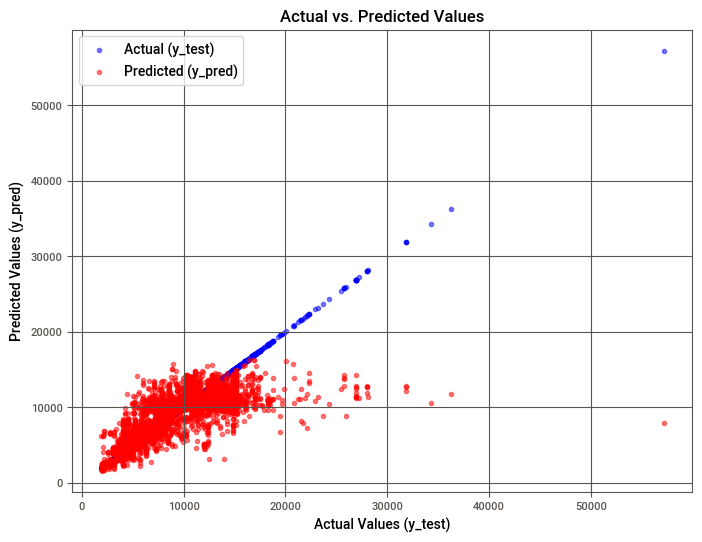

In [136]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


### Insights

       Our Support Vector Regressor (SVR) model had an initial R-squared (R2) score of 15% before hyperparameter tuning.
    After tuning, the model's score improved to 50%, signifying that the tuned SVR model explains approximately 50% of the variance in flight fares, marking a substantial improvement in predictive performance compared to the original model. 

### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [84]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [85]:
y_pred=dt.predict(X_test)

### Model Evaluation

In [86]:
#R2_score
dt_r2_score=r2_score(y_test,y_pred)
dt_r2_score

0.7515596290752289

In [87]:
#Adjust R2_score
adj_r2=1-(1-dt_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.7493693487270257

### HyperParameter Tuning for DecisionTreeRegressor

In [100]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2', None]  
}
dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_regressor, param_grid, scoring='r2', cv=5, verbose=2)
grid_search.fit(X, y)
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf

[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_lea

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=1

[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_spl

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=

[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_spl

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10

[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_spl

[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10

[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_spli

In [88]:
dtreg=DecisionTreeRegressor(max_depth= 10,max_features='auto',min_samples_leaf=2,min_samples_split=2)

In [89]:
dtreg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2)

In [90]:
y_pred=dtreg.predict(X_test)

### Model Evaluation 

In [91]:
# R2_score
dt_r2_score=r2_score(y_test,y_pred)
dt_r2_score

0.7664331814296529

In [92]:
#Adjust R2_Score
adj_r2=1-(1-dt_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.7643740281173198

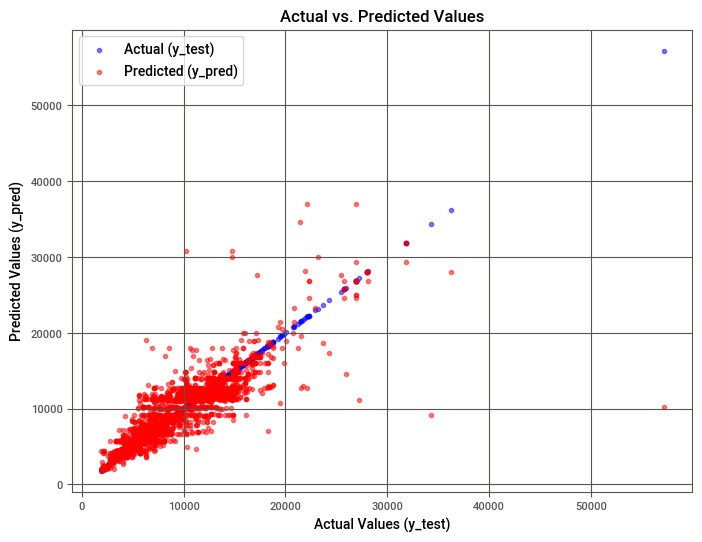

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


### Insights

     Our DecisionTree Regressor  model had an initial R-squared (R2) score of 75% before hyperparameter tuning. 
    After tuning, the model's score improved to 76%, signifying that the tuned DecisionTree model explains approximately 76% of the variance in flight fares, marking a substantial improvement in predictive performance compared to the original model. 

###  Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [95]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [96]:
y_pred=rf.predict(X_test)

### Model Evaluation

In [97]:
#R2_Score
rf_r2_score=r2_score(y_test,y_pred)
rf_r2_score

0.8186437128380146

In [98]:
#Adjust_r2_score
adj_r2=1-(1-rf_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.817044853883186

### Hyperparameter Tuning for Randomforest Regressor

In [99]:
#initializie the libraries and parameters 
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=100,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

In [100]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
rf_ht=RandomForestRegressor(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=1, 
                            random_state=42, n_jobs=-1, scoring='r2')
rf_cv.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=1)

In [102]:
rf_best_params=rf_cv.best_params_
print(f"best_params:{rf_best_params}")

best_params:{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 73, 'bootstrap': False}


In [103]:
rfr1=RandomForestRegressor(n_estimators=1000,max_features='sqrt',max_depth=73,min_samples_split=10,
                           min_samples_leaf=1,random_state=42,bootstrap=False)

In [104]:
rfr1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=73, max_features='sqrt',
                      min_samples_split=10, n_estimators=1000, random_state=42)

In [105]:
y_pred=rfr1.predict(X_test)

### Model Evalution

In [106]:
#R2_Score
rf_r2_score=r2_score(y_test,y_pred)
rf_r2_score

0.8443795068216015

In [107]:
#Adjust_r2_score
adj_r2=1-(1-rf_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.8430075377381647

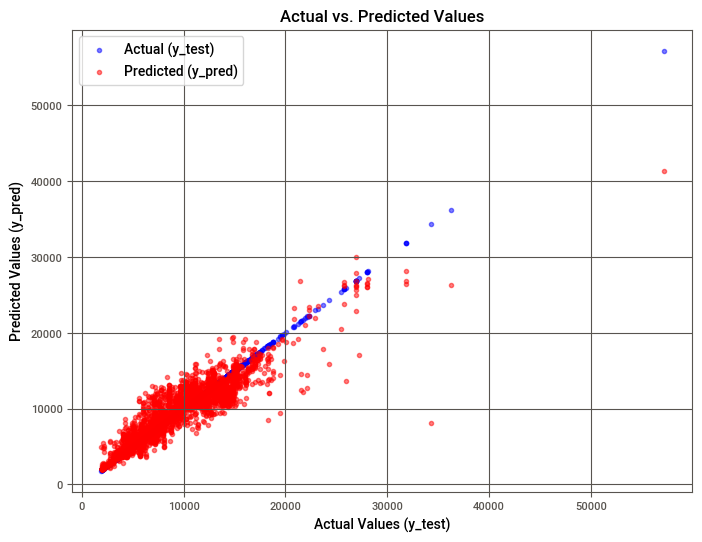

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

### Insights

     Our RandomForest Regressor  model had an initial R-squared (R2) score of 81% before hyperparameter tuning. 
    After tuning, the model's score improved to 84%, signifying that the tuned RandomForest model explains approximately 84% of the variance in flight fares, marking a substantial improvement in predictive performance compared to the
    original model. 

###   Gradient Boosting

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()

In [110]:
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [111]:
y_pred=gb.predict(X_test)

### Model Evaluation

In [113]:
#R2_Score
gb_r2_score=r2_score(y_test,y_pred)
gb_r2_score

0.792721173268202

In [114]:
#Adjust_r2_score
adj_r2=1-(1-gb_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.7908937780703147

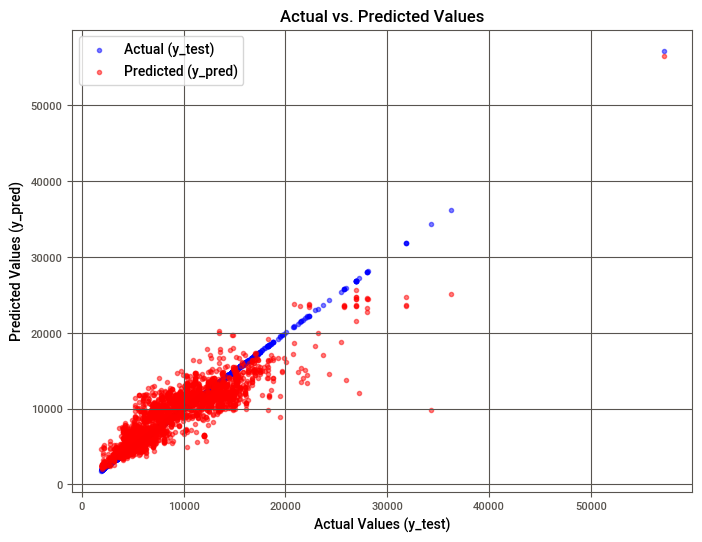

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_pred)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

### Insights

     Our Gradient Boosting  Regressor  model's prediction R-squared (R2) score is 79%. so our  Gradient Boosting Regressor model accounts for approximately 79% of the variance in the flight fares.

### XG Boosting

In [116]:
import xgboost
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [117]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [118]:
y_pred=xgb.predict(X_test)

### Model Evaluation

In [119]:
#R2_Score
xg_r2_score=r2_score(y_test,y_pred)
xg_r2_score

0.8388122414858503

In [120]:
#Adjust_r2_score
adj_r2=1-(1-xg_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.8373911907180933

### Hyperparameter Tuning for XGBoosting

In [121]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={ 'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
xbg2=XGBRegressor(random_state=42)
xgb_cv=RandomizedSearchCV(estimator=xbg2,param_distributions=param_grid,n_iter=100,cv=3,verbose=1,
                          random_state=42,n_jobs=-1,scoring='r2')
xgb_cv.fit(X,y)
cv_best_params=xgb_cv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 6.4, 'reg_alpha': 0.4, 'n_estimators': 65, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 3.2})


In [122]:
xgb2=XGBRegressor(reg_lambda=6.4,reg_alpha=0.4,n_estimators=65,max_depth=10,learning_rate=0.2,gamma=3.2,random_state=42)

In [123]:
xgb2.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=3.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=65, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [124]:
y_pred=xgb2.predict(X_test)

### Model Evaluation

In [125]:
#R2_Score
xgb_r2_score=r2_score(y_test,y_pred)
xgb_r2_score

0.8563023380498472

In [126]:
#Adjust_r2_score
adj_r2=1-(1-xgb_r2_score)*(3205-1)/(3205-28-1)
adj_r2

0.8550354820880701

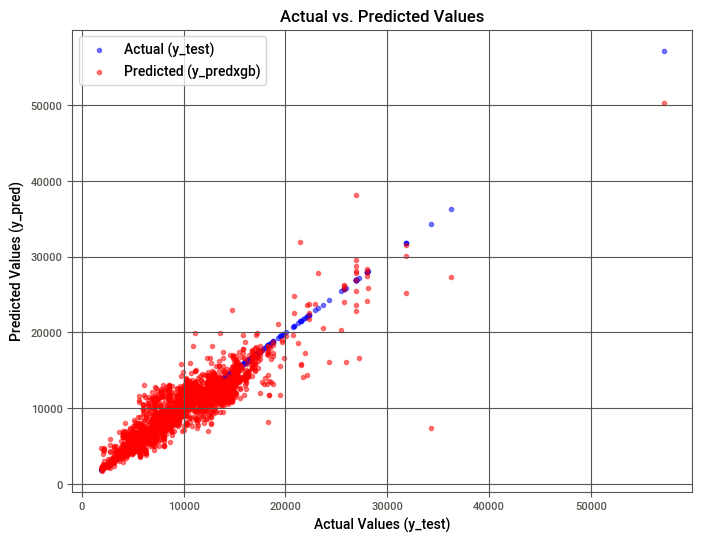

In [127]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, c='blue', marker='o', alpha=0.5, label='Actual (y_test)')
plt.scatter(y_test, y_pred, c='red', marker='o', alpha=0.5, label='Predicted (y_predxgb)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.legend()  
plt.grid(True)
plt.show()

### Insights

     Our XG Boosting Regressor  model had an initial R-squared (R2) score of 83% before hyperparameter tuning. 
    After tuning, the model's score improved to 85%, signifying that the tuned XG Boosting model explains approximately 85% of the variance in flight fares, marking a substantial improvement in predictive performance compared to the
    original model.

### Final Report

In [137]:
scores=[r2,knn_r2,svm_r2,dt_r2_score,rf_r2_score,gb_r2_score,xgb_r2_score]
algorithms=['LinearRegression','KNN','SVM','DecisionTree','RandomForest','GradientBoosting','XGBoosting']
for i in range(len(algorithms)):
    print("The R2 Score acheived using " + algorithms[i] + ' is: ' + str(scores[i])+"%")

The R2 Score acheived using LinearRegression is: 0.5794694217394092%
The R2 Score acheived using KNN is: 0.5528909899503456%
The R2 Score acheived using SVM is: 0.5071936473188907%
The R2 Score acheived using DecisionTree is: 0.7664331814296529%
The R2 Score acheived using RandomForest is: 0.8443795068216015%
The R2 Score acheived using GradientBoosting is: 0.792721173268202%
The R2 Score acheived using XGBoosting is: 0.8563023380498472%


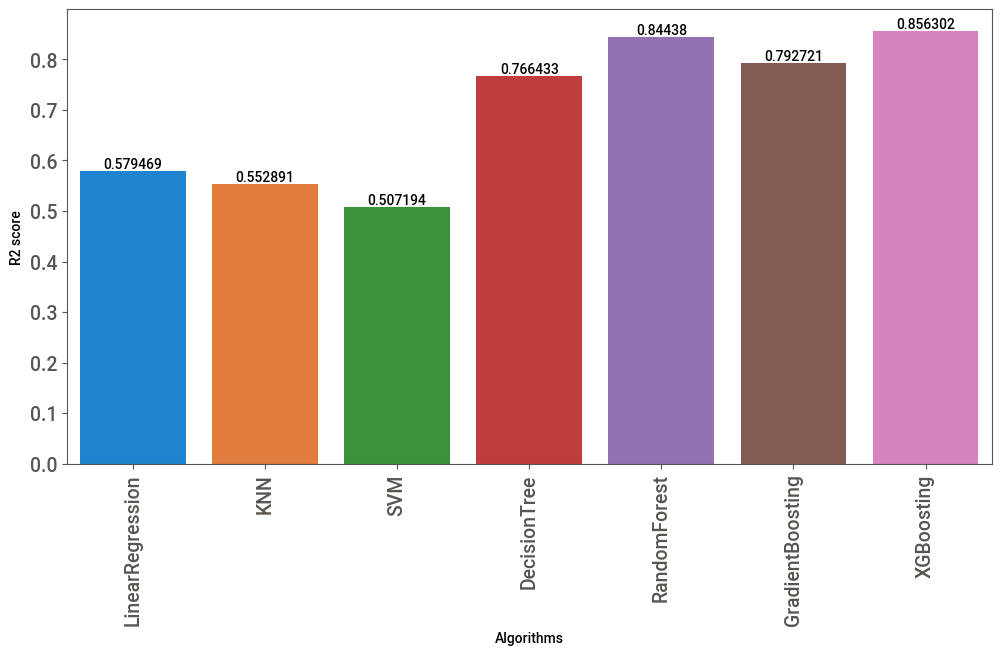

In [138]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.tick_params(labelsize=14)

## Summary

"After trying various models, the XGBoost model achieved an R2 score of 86%, indicating that 
      it is the superior model."

## Conclusion

Summarize by stating that your XGBoost model, with an 86% R2 score, is a promising solution for your problem. It outperforms other models you've tried and provides valuable insights into the relationship between your features and target variable. However, remember to use this model responsibly and consider its interpretability and practicality in real-world applications.

## Challenges Faced in Data and Techniques 

   **Data Quality and Preprocessing:**

     Inaccurate or incomplete data is a common challenge. Cleaning and preprocessing the data involves handling missing 
     values, outliers, and ensuring consistency in data formats.

   **Feature Engineering:**

    Creating meaningful features from the raw data can be challenging. Feature selection and extraction techniques 
    are often used to improve model performance.
    
   **Categorical Variables:**

    Handling categorical variables like airline names, departure/arrival locations, and class types requires encoding 
    or feature engineering to make them suitable for machine learning models.
    
## Techniques Used in Flight Fare Prediction:

   **Model Selection:**

     Choosing the right machine learning algorithm or ensemble of algorithms can be challenging. Common choices
     for regression tasks like flight fare prediction include XGBoost, Random Forest, and Linear Regression.
    
   **Cross-Validation:**

      Cross-validation is used to assess the model's performance and ensure it generalizes well to unseen data. 
      Common techniques include k-fold cross-validation.
   **Hyperparameter Tuning:**

     Hyperparameter tuning using techniques like grid search or random search helps optimize model parameters 
     to achieve the best performance.
   **Ensemble Techniques:**

     Ensemble methods such as stacking or blending multiple models (e.g., XGBoost, Random Forest and 
     Gradient Boost) can improve predictive accuracy.
     
   **Feature Engineering for Categorical Data:**

     Techniques such as one-hot encoding, label encoding, or target encoding are used to convert 
     categorical variables into a suitable format for modeling.
   
 ## Conclusion
 
     With an 86% model score, it appears that your model has performed well in predicting flight fares. However, 
     it's essential to validate the model's performance rigorously and consider potential challenges and limitations,
     such as generalization to unseen data and model interpretability, before deploying it in real-world applications.